In [6]:
from utils import load_video
from simulation import multiplex_v2, multiplex_v3
from matplotlib import pyplot as plt
import numpy as np
import torch
from time import time

In [2]:
path = '/scratch/ondemand23/mrsalehi/original_high_fps_videos/720p_240fps_1.mov'
subframes = load_video(path)

In [3]:
subframes.shape

(742, 720, 1280)

In [4]:
subframe = subframes[0]

In [5]:
from matplotlib import pyplot as plt

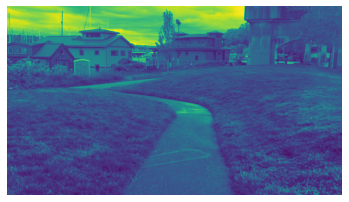

In [7]:
plt.axis('off')
plt.imshow(subframe)
plt.show()

### Loading the video

In [15]:
path = '/scratch/ondemand23/mrsalehi/original_high_fps_videos/720p_240fps_1.mov'
subframes = load_video(path)
subframes = torch.FloatTensor(subframes).cuda()

### Simulation

In [16]:
S = 5
W = torch.FloatTensor([[1, 1, 0, 0, 0], [1, 0, 1, 0, 0], [1, 0, 0, 1, 0], [1, 0, 0, 0, 1]]).cuda()
path = '/scratch/ondemand23/mrsalehi/original_high_fps_videos/720p_240fps_1.mov'

subframes = subframes[50:50+S]  # picking S subframes
height, width = subframes.shape[1], subframes.shape[2]

nbhds = [[(2*i, 2*j), (2*i, 2*j+1), (2*i+1, 2*j), (2*i+1, 2*j+1)] \
    for i in range(int(height / 2)) for j in range(int(width / 2))]

nbhds_rows = torch.LongTensor([[el[0] for el in nbhd] for nbhd in nbhds]).cuda()
nbhds_cols = torch.LongTensor([[el[1] for el in nbhd] for nbhd in nbhds]).cuda()

start = time()
c2b_frame_bucket0, c2b_frame_bucket1 = multiplex_v2(subframes, W, nbhds_rows, nbhds_cols)
end = time()

print(f'Simulation took {end - start} seconds')

First for loop took 6.942519664764404 seconds
Gather took 0.018047571182250977 seconds
Matrix multiplication took 0.018047571182250977 seconds
Second for loop took 10.671408891677856 seconds
Simulation took 18.30742907524109 seconds


In [22]:
# c2b_frame_bucket0 = c2b_frame_bucket0.cpu().numpy()
c2b_frame_bucket1 = c2b_frame_bucket1.cpu().numpy()

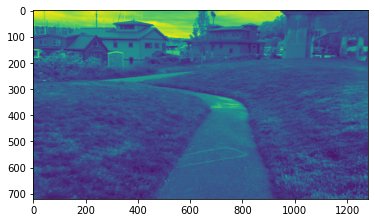

In [23]:
plt.imshow(c2b_frame_bucket1);

In [61]:
W = torch.FloatTensor([[[1, 1, 0], [1, 1, 1]], [[0 ,0, 0], [1, 0, 1]]]).cuda()
subframes = torch.FloatTensor([[[1, 1, 1], [1, 0, 0]], [[0 ,0, 0], [0, 0, 1]]]).cuda()

In [62]:
c2b_bucket0, c2b_bucket1 = multiplex_v3(subframes, W)

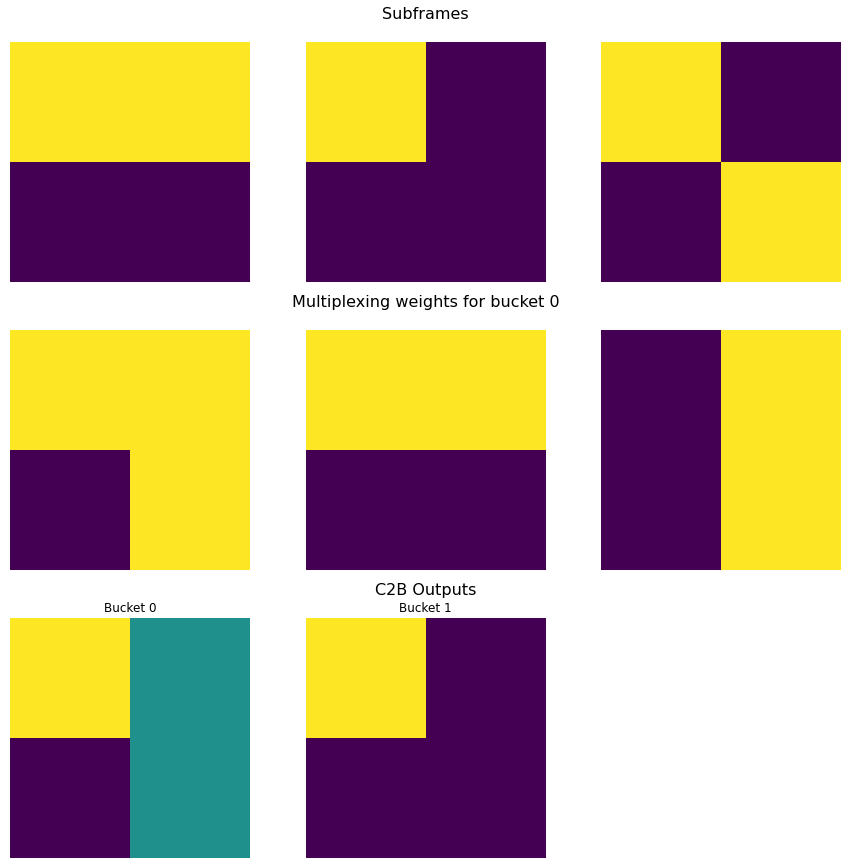

In [64]:
S = W.shape[2]

fig, big_axes = plt.subplots( figsize=(15.0, 15.0) , nrows=3, ncols=1, sharey=True)

big_titles = ['Subframes', 'Multiplexing weights for bucket 0', 'C2B Outputs']

for row, big_ax in enumerate(big_axes, start=1):
    big_ax.set_title(f'{big_titles[row - 1]}\n', fontsize=16)

    # Turn off axis lines and ticks of the big subplot 
    # obs alpha is 0 in RGBA string!
    big_ax.tick_params(labelcolor=(1.,1.,1., 0.0), top='off', bottom='off', left='off', right='off')
    big_ax.axis('off')
    # removes the white frame
    big_ax._frameon = False


# for i in range(1,10):
#     ax = fig.add_subplot(3,3,i)
#     ax.set_title('Plot title ' + str(i))
    
# figure, axs = plt.subplots(1, 3)

for i in range(0, 3):
    ax1 = fig.add_subplot(3,3,i+1)
    ax1.imshow(subframes[..., i].cpu().numpy())
    ax1.axis('off')
    
    ax2 = fig.add_subplot(3,3,i+4)
    ax2.imshow(W[..., i].cpu().numpy())
    ax2.axis('off')
    
    
ax1 = fig.add_subplot(3, 3, 7)
ax1.imshow(c2b_bucket0.cpu().numpy())
ax1.set_title('Bucket 0')
ax1.axis('off')

ax2 = fig.add_subplot(3, 3, 8)
ax2.imshow(c2b_bucket1.cpu().numpy())
ax2.set_title('Bucket 1')
ax2.axis('off')
    

plt.savefig('vis1.png')
    
# for i in range(0, 3):
#     ax = fig.add_subplot(3,3,i+4)
#     ax.imshow(W[..., i].cpu().numpy())
#     ax.axis('off')
    
    
# for i in range(0, 3):
#     ax = fig.add_subplot(3,3,i+4)
#     ax.imshow(W[..., i].cpu().numpy())
#     ax.axis('off')

# for i in range(1,10):
#     ax = fig.add_subplot(3,3,i)
#     ax.imshow()
#     ax.set_title('Plot title ' + str(i))
#     ax.axis('off')

# for i in range(S):
#     W_s = W[..., i]
#     W_s_np = W_s.cpu().numpy()
#     axs[i].axis('off')
#     axs[i].imshow(W_s_np)

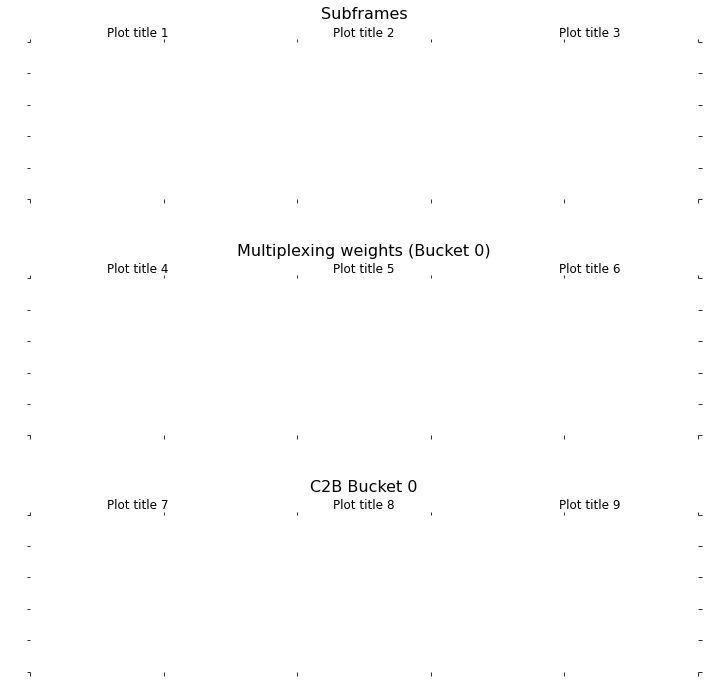

In [33]:
import matplotlib.pyplot as plt

fig, big_axes = plt.subplots( figsize=(10.0, 10.0) , nrows=3, ncols=1, sharey=True) 

big_titles = ['Subframes', 'Multiplexing weights (Bucket 0)', 'C2B Bucket 0']

for row, big_ax in enumerate(big_axes, start=1):
    big_ax.set_title(f'{big_titles[row - 1]}\n', fontsize=16)

    # Turn off axis lines and ticks of the big subplot 
    # obs alpha is 0 in RGBA string!
    big_ax.tick_params(labelcolor=(1.,1.,1., 0.0), top='off', bottom='off', left='off', right='off')
    # removes the white frame
    big_ax._frameon = False


for i in range(1,10):
    ax = fig.add_subplot(3,3,i)
    ax.set_title('Plot title ' + str(i))
    ax.axis('off')

fig.set_facecolor('w')
plt.tight_layout()
plt.show()